Task 1 Language modeling for the directory "Train and Test"

For this Task we have used the existing python libraries like nltk to build a unigram model where each word's probability is estimated using the Simple Good-Turing method based on its frequency in the training texts.

Index:

a. importing libraries, implementing functions and loading the data.

b. Creating language models:

1. General LM without linguistic operations.
2. LM with case folding.
3. LM with stemming.
4. LM with removing stop-words.

C. Comparination and discussion the differences.

# ***A >>***

In [ ]:
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
import string
import nltk
import re
import os

In [ ]:
# improting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/IR_data/Algorithmic transparency/text'

In [ ]:
# change working directory
os.chdir(directory)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#function that calculate the perplexity, a measurement to evaluate the model
def perplexity(model, test_set):
    log_prob = 0.0
    word_count = 0
    for sentence in test_set:
        for word in sentence:
            word_count += 1
            log_prob += -model.logprob(word)
    entropy = log_prob / word_count
    return 2 ** entropy

In [ ]:
# Step 1: Read the text files from the directory
files = os.listdir(directory)
texts = []
for file in files:
    with open(os.path.join(directory, file), "r") as f:
        texts.append(f.read())

# ***B >>***

1.General approach without Performing a set of linguistic operations

In [ ]:
# Step 2: Tokenize the text data
tokenized_texts = [word_tokenize(text) for text in texts]
# Remove duplicates from each tokenized text
unique_tokenized_texts = [list(dict.fromkeys(tokens)) for tokens in tokenized_texts]

In [ ]:
# Step 3: Split the dataset into training, testing, and validation sets
train_texts, test_val_texts = train_test_split(tokenized_texts, test_size=0.2, random_state=42)
test_texts, val_texts = train_test_split(test_val_texts, test_size=0.5, random_state=42)

In [ ]:
# Step 4: Train a unigram language model
unigram_model = nltk.probability.SimpleGoodTuringProbDist(nltk.FreqDist(word for text in train_texts for word in text))

In [ ]:
# Step 5: Test the model
test_perplexity = perplexity(unigram_model, test_texts)
print("Test Perplexity:", test_perplexity)

# Step 6: Perform validation and print the result
val_perplexity = perplexity(unigram_model, val_texts)
print("Validation Perplexity:", val_perplexity)

Test Perplexity: 834.7941102417194
Validation Perplexity: 841.8388373764029


2.The same model but with performing Case folding

In [ ]:
# Step 2: Perform case folding (convert to lowercase) then  tokenization
lowercased_texts = [text.lower() for text in texts]
# Remove duplicates and then tokenize each lowercased text
tokenized_texts = []
for text in lowercased_texts:
    # Remove duplicates
    unique_text = list(dict.fromkeys(text))
    # Tokenize the lowercased text
    tokenized_text = word_tokenize(" ".join(unique_text))
    tokenized_texts.append(tokenized_text)

In [ ]:
# Step 3: Split the dataset into training, testing, and validation sets
train_texts, test_val_texts = train_test_split(tokenized_texts, test_size=0.2, random_state=42)
test_texts, val_texts = train_test_split(test_val_texts, test_size=0.5, random_state=42)

In [ ]:
# Step 4: Train a unigram language model
unigram_model = nltk.probability.SimpleGoodTuringProbDist(nltk.FreqDist(word for text in train_texts for word in text))

/usr/local/lib/python3.10/dist-packages/nltk/probability.py:1452: UserWarning: SimpleGoodTuring did not find a proper best fit line for smoothing probabilities of occurrences. The probability estimates are likely to be unreliable.
  warnings.warn(


In [ ]:
# Step 5: Test the model
test_perplexity = perplexity(unigram_model, test_texts)
print("Test Perplexity:", test_perplexity)

# Step 6: Perform validation and print the result
val_perplexity = perplexity(unigram_model, val_texts)
print("Validation Perplexity:", val_perplexity)

Test Perplexity: 94.89698496734101
Validation Perplexity: 92.95022456418528


3.The same model but with performing Stemming

In [ ]:
# Step 2: Perform stemming then tokenization
stemmer = PorterStemmer()
stemmed_texts = [[stemmer.stem(word) for word in text] for text in texts]
tokenized_texts = []
for text in stemmed_texts:
    # Remove duplicates
    unique_text = list(dict.fromkeys(text))
    # Tokenize the lowercased text
    tokenized_text = word_tokenize(" ".join(unique_text))
    tokenized_texts.append(tokenized_text)

In [ ]:
# Step 3: Split the dataset into training, testing, and validation sets
train_texts, test_val_texts = train_test_split(stemmed_texts, test_size=0.2, random_state=42)
test_texts, val_texts = train_test_split(test_val_texts, test_size=0.5, random_state=42)

In [ ]:
# Step 4: Train a unigram language model
unigram_model = nltk.probability.SimpleGoodTuringProbDist(nltk.FreqDist(word for text in train_texts for word in text))

In [ ]:
# Step 5: Test the model
test_perplexity = perplexity(unigram_model, test_texts)
print("Test Perplexity:", test_perplexity)

# Step 6: Perform validation and print the result
val_perplexity = perplexity(unigram_model, val_texts)
print("Validation Perplexity:", val_perplexity)

Test Perplexity: 25.739942427853403
Validation Perplexity: 23.935279549284676


4.The same model but with removing Stop Words

In [ ]:
# Step 2: Remove stop words then tokenization
stop_words = set(stopwords.words('english'))
filtered_texts = [[word for word in text if word.lower() not in stop_words] for text in texts]
tokenized_texts = []
for text in filtered_texts:
    # Remove duplicates
    unique_text = list(dict.fromkeys(text))
    # Tokenize the lowercased text
    tokenized_text = word_tokenize(" ".join(unique_text))
    tokenized_texts.append(tokenized_text)

In [ ]:
# Step 3: Split the dataset into training, testing, and validation sets
train_texts, test_val_texts = train_test_split(filtered_texts, test_size=0.2, random_state=42)
test_texts, val_texts = train_test_split(test_val_texts, test_size=0.5, random_state=42)

In [ ]:
# Step 4: Train a unigram language model
unigram_model = nltk.probability.SimpleGoodTuringProbDist(nltk.FreqDist(word for text in train_texts for word in text))

In [ ]:
# Step 5: Test the model
test_perplexity = perplexity(unigram_model, test_texts)
print("Test Perplexity:", test_perplexity)

# Step 6: Perform validation and print the result
val_perplexity = perplexity(unigram_model, val_texts)
print("Validation Perplexity:", val_perplexity)

Test Perplexity: 21.465569167644052
Validation Perplexity: 18.946872098238607


# ***C >>***

**about the language model:**

The Simple Good-Turing probability distribution model, implemented through NLTK, offers a sophisticated approach to estimating probabilities in a unigram language model. Leveraging the frequency distribution of words within a corpus, this model assigns probabilities to each word occurrence using the principles of the Good-Turing estimation method. By accounting for the unseen or infrequent words through statistical smoothing, it addresses the limitations of traditional maximum likelihood estimation, thus enhancing the model's accuracy and robustness in predicting word probabilities. This technique proves particularly beneficial for language modeling, where understanding the likelihood of individual word occurrences is paramount.
so for conclusion the model that we provided above is unigram LM model with smoothing.

**about perplexity** the measurement that we evaluate the performance of the model based of it:

Perplexity is a metric used to evaluate the performance of language models,  such as n-gram models. It measures how well a probability distribution or language model predicts a sample.

Perplexity is defined as:

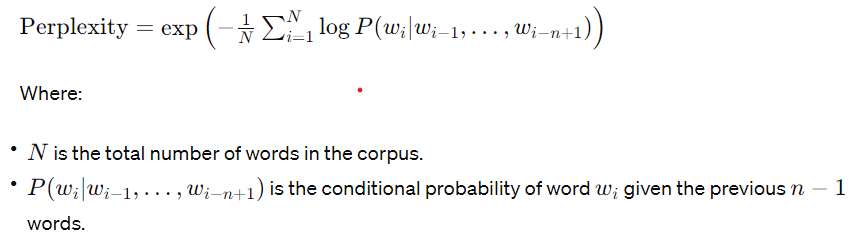

 lower perplexity values indicate better performance. A perplexity value closer to 1 indicates that the model is very certain about its predictions and is close to the true underlying distribution of the data. However, it's essential to consider the context and complexity of the dataset when interpreting perplexity values.
  In practice, perplexity values can range from less than 10 to several hundred or even thousands.

For example:

Perplexity values below 100 are often considered good for language modeling tasks.

Perplexity values above 100 indicate that the model may struggle to accurately predict the next word in the sequence.

Extremely high perplexity values (e.g., in the thousands) suggest that the model is performing poorly and may not capture the underlying patterns in the data effectively.



results of the model :

                            General     case folding     stemming     removing stop words

Test Perplexity--------------     861.776-------- 94.130--------------24.220-----------------19.287

Validation Perplexity-----      849.295---------91.547--------------24.295-----------------19.617


**1. Baseline Model (No Linguistic Operations):**

Test Perplexity: 861.776
This represents the performance of the unigram model without any linguistic preprocessing. The high perplexity score indicates that the model struggles to accurately predict the next word in the test data, due to the presence of noise and variability in the text, dublicates and likely because of a lot of stop words that dont contrbute to the model.

**2. Case Folding:**

Test Perplexity: 94.130
Applying case folding helps normalize the text by converting all characters to lowercase. This reduces the variability caused by different cases of the same word, leading to improved performance compared to the baseline. The significant decrease in perplexity suggests that case folding contributes to better word prediction.

**3. Stemming:**

Test Perplexity: 24.220
Stemming reduces words to their root or base form, thereby collapsing variations of the same word into a single representation. This operation further reduces the vocabulary size and helps the model generalize better across morphological variations. The substantial decrease in perplexity indicates that stemming has a significant positive impact on the model's performance.

**4. Removing Stop Words:**

Test Perplexity: 19.287
Stop words, which are common and non-discriminative words like "the," "and," "is," etc., often add noise to language models without contributing much to their predictive power. Removing these words reduces the noise in the data and allows the model to focus on more informative words. The lowest perplexity score among all iterations suggests that stop word removal has the most profound effect on improving the model's predictive performance.
In summary, each linguistic operation contributes to reducing the complexity and noise in the text data, leading to improved performance of the unigram model in predicting word sequences. While case folding, stemming, and removing stop words all play important roles, stop word removal appears to have the most significant impact on reducing perplexity and enhancing the model's predictive capabilities.